# Neptune Project Data Manipulation Notebook
This notebook contains the code required to take all of the data for an individual year and produce lat-R and lat-gradR plots.

These first few cells are importing all of the required packages and then defining functions which I will call upon later, it is imperative that these are the first cells run on every loading of the notebook.

In [2]:
#This cell imports the required modules to the notebook
#RUN THIS CELL BEFORE ANY OTHER CODE IS RUN
import matplotlib.pyplot as plt     #imports graph plotting library
import astropy.io.fits as ast       #imports FITS manipulation library
import numpy as np                  #imports numerical manipulation library
import random                       #imports module to generate random numbers for monte carlo error propagation

#magic function that forces plots to appear in this notebook
%matplotlib inline                  
plt.ion()                           #function that loads plotting library in "interactive mode"

from astropy.utils.data import get_pkg_data_filename   #imports function to get filename of data file
from scipy.stats import sem

print("Required Libraries Loaded Successfully")

def graderr(R, err, n): #user defined function does monte carlo error propagation
    """
    function for calculating the error in the gradient, using a monte carlo error propagation philosophy
    """
    grads = [[] for count in range(n)]                 #initialises list of lists, with indices [iteration][latitude]
    for i in range(n):                                 #loops through randomisation process n times
        randR = np.zeros(len(R))                       #initialises list of random R values
        for j in range(len(R)):                        #loops through the random function to form the list
            randR[j] = random.uniform(R[j]-err[j], R[j]+err[j]) #generates random number within bounds of error bars
        grads[i] = np.gradient(randR)                  #finds the gradient of the random R list generated above
        
    graderr = np.zeros(len(R))                         #initialises the list of gradient errors
    for i in range(len(R)):                            #loops through list of error calculation from the lists of random R
        gradforpoint = np.zeros(n)                     #initialises restructured list of iterations of grad, index [latitude]
        for j in range(n):                             #loops through the iterations
            gradforpoint[j] = grads[j][i]              #gets the gradR error through each iteration and makes a new list from it
        graderr[i] = (max(gradforpoint)-min(gradforpoint))/2 #calculates error by finding the mean of the max and min errors
    return(graderr)                                    #returns list of errors
        
print("User-Defined Functions Loaded Successfully")

Required Libraries Loaded Successfully
User-Defined Functions Loaded Successfully


# Bone Colormap Modification for Each Filter

In [3]:
from matplotlib import cm #import colormap manipulation sections
from matplotlib.colors import ListedColormap, LinearSegmentedColormap #import functions to define a colormap

bone = cm.get_cmap('bone')

myboned = {'red': [[0.0, 0.0, 0.0],
                  #[0.0, 0.0, 0.0], #start
                  [0.75, 0.65, 0.65], #anchor 0.75
                  #[1.0, 1.0, 1.0], #end
                  [1.0, 1.0, 1.0]], 
         'green': [[0.0, 0.0, 0.0],
                   #[0.0, 0.0, 0.0], #start
                   [0.36, 0.31, 0.31], #anchor 0.36
                   [0.75, 0.78, 0.78], #anchor 0.75
                   #[1.0, 1.0, 1.0], #end
                   [1.0, 1.0, 1.0]],
         'blue': [[0.0, 0.0, 0.0],
                  #[0.0, 0.0, 0.0], #start
                  [0.36, 0.45, 0.45], #anchor 0.36
                  #[1.0, 1.0, 1.0], #end
                  [1.0, 1.0, 1.0]]}
mybone = LinearSegmentedColormap('mybone', segmentdata = myboned, N=256)

cmF467Md = {'red': [[0.0, 0.0, 0.0],
                    [0.55, 0.0, 0.0], #start
                    [0.7, 0.65, 0.65], #anchor 0.75
                    [0.75, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]], 
           'green': [[0.0, 0.0, 0.0],
                     [0.55, 0.0, 0.0], #start
                     [0.622, 0.31, 0.31], #anchor 0.36
                     [0.7, 0.78, 0.78], #anchor 0.75
                     [0.75, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]],
           'blue': [[0.0, 0.0, 0.0],
                    [0.55, 0.0, 0.0], #start
                    [0.622, 0.45, 0.45], #anchor 0.36
                    [0.75, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]]}
cmF467M = LinearSegmentedColormap('cm467', segmentdata = cmF467Md, N=256)

cmF547Md = {'red': [[0.0, 0.0, 0.0],
                    [0.7, 0.0, 0.0], #start
                    [0.85, 0.65, 0.65], #anchor 0.75
                    [0.9, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]], 
           'green': [[0.0, 0.0, 0.0],
                     [0.7, 0.0, 0.0], #start
                     [0.772, 0.31, 0.31], #anchor 0.36
                     [0.85, 0.78, 0.78], #anchor 0.75
                     [0.9, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]],
           'blue': [[0.0, 0.0, 0.0],
                    [0.7, 0.0, 0.0], #start
                    [0.772, 0.45, 0.45], #anchor 0.36
                    [0.9, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]]}
cmF547M = LinearSegmentedColormap('cm547', segmentdata = cmF547Md, N=256)

cmFQ619Nd = {'red': [[0.0, 0.0, 0.0],
                     [0.25, 0.0, 0.0], #start
                     [0.475, 0.65, 0.65], #anchor 0.75
                     [0.55, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]], 
            'green': [[0.0, 0.0, 0.0],
                      [0.25, 0.0, 0.0], #start
                      [0.358, 0.31, 0.31], #anchor 0.36
                      [0.475, 0.78, 0.78], #anchor 0.75
                      [0.55, 1.0, 1.0], #end
                      [1.0, 1.0, 1.0]],
            'blue': [[0.0, 0.0, 0.0],
                     [0.25, 0.0, 0.0], #start
                     [0.358, 0.45, 0.45], #anchor 0.36
                     [0.55, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]]}
cmFQ619N = LinearSegmentedColormap('cm619', segmentdata = cmFQ619Nd, N=256)

cmF657Nd = {'red': [[0.0, 0.0, 0.0],
                    [0.45, 0.0, 0.0], #start
                    [0.7125, 0.65, 0.65], #anchor 0.75
                    [0.8, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]], 
           'green': [[0.0, 0.0, 0.0],
                     [0.45, 0.0, 0.0], #start
                     [0.576, 0.31, 0.31], #anchor 0.36
                     [0.7125, 0.78, 0.78], #anchor 0.75
                     [0.8, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]],
           'blue': [[0.0, 0.0, 0.0],
                    [0.45, 0.0, 0.0], #start
                    [0.576, 0.45, 0.45], #anchor 0.36
                    [0.8, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]]}
cmF657N = LinearSegmentedColormap('cm657', segmentdata = cmF657Nd, N=256)

cmFQ727Nd = {'red': [[0.0, 0.0, 0.0],
                     [0.1, 0.0, 0.0], #start
                     [0.2125, 0.65, 0.65], #anchor 0.75
                     [0.25, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]], 
            'green': [[0.0, 0.0, 0.0],
                      [0.1, 0.0, 0.0], #start
                      [0.154, 0.31, 0.31], #anchor 0.36
                      [0.2125, 0.78, 0.78], #anchor 0.75
                      [0.25, 1.0, 1.0], #end
                      [1.0, 1.0, 1.0]],
            'blue': [[0.0, 0.0, 0.0],
                     [0.1, 0.0, 0.0], #start
                     [0.154, 0.45, 0.45], #anchor 0.36
                     [0.25, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]]}
cmFQ727N = LinearSegmentedColormap('cm727', segmentdata = cmFQ727Nd, N=256)

cmF763Md = {'red': [[0.0, 0.0, 0.0],
                    [0.3, 0.0, 0.0], #start
                    [0.4125, 0.65, 0.65], #anchor 0.75
                    [0.45, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]], 
           'green': [[0.0, 0.0, 0.0],
                     [0.3, 0.0, 0.0], #start
                     [0.354, 0.31, 0.31], #anchor 0.36
                     [0.4125, 0.78, 0.78], #anchor 0.75
                     [0.45, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]],
           'blue': [[0.0, 0.0, 0.0],
                    [0.3, 0.0, 0.0], #start
                    [0.345, 0.45, 0.45], #anchor 0.36
                    [0.45, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]]}
cmF763M = LinearSegmentedColormap('cm763', segmentdata = cmF763Md, N=256)

cmF845Md = {'red': [[0.0, 0.0, 0.0],
                    [0.2, 0.0, 0.0], #start
                    [0.275, 0.65, 0.65], #anchor 0.75
                    [0.3, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]], 
           'green': [[0.0, 0.0, 0.0],
                     [0.2, 0.0, 0.0], #start
                     [0.236, 0.31, 0.31], #anchor 0.36
                     [0.275, 0.78, 0.78], #anchor 0.75
                     [0.3, 1.0, 1.0], #end
                     [1.0, 1.0, 1.0]],
           'blue': [[0.0, 0.0, 0.0],
                    [0.2, 0.0, 0.0], #start
                    [0.236, 0.45, 0.45], #anchor 0.36
                    [0.3, 1.0, 1.0], #end
                    [1.0, 1.0, 1.0]]}
cmF845M = LinearSegmentedColormap('cm845', segmentdata = cmF845Md, N=256)

def plot_linearmap(cdict):
    newcmp = cdict
    rgba = newcmp(np.linspace(0, 1, 256))
    fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
    col = ['r', 'g', 'b']
    for xx in [0.25, 0.5, 0.75]:
        ax.axvline(xx, color='0.7', linestyle='--')
    for i in range(3):
        ax.plot(np.arange(256)/256, rgba[:, i], color=col[i])
    ax.set_xlabel('index')
    ax.set_ylabel('RGB')
    plt.show()

#plot_linearmap(bone)
#plot_linearmap(mybone)
#plot_linearmap(cmF467M)
#plot_linearmap(cmF547M)
#plot_linearmap(cmFQ619N)
#plot_linearmap(cmF657N)
#plot_linearmap(cmFQ727N)
#plot_linearmap(cmF763M)
#plot_linearmap(cmF845M)

#cmaps = [cmF467M, cmF547M, cmFQ619N, cmF657N, cmFQ727N, cmF763M, cmF845M]
cmaps = [bone, bone, bone, bone, bone, bone, bone]

# Cycle 26 Neptune (2019)


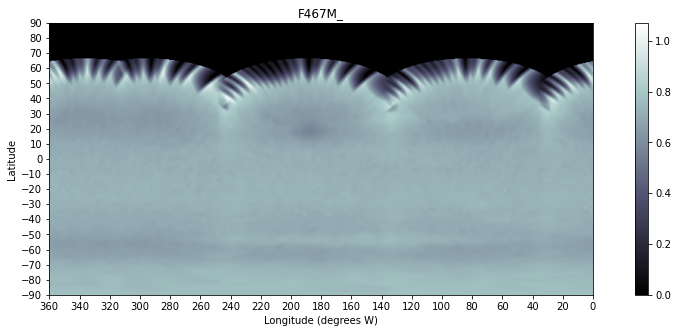

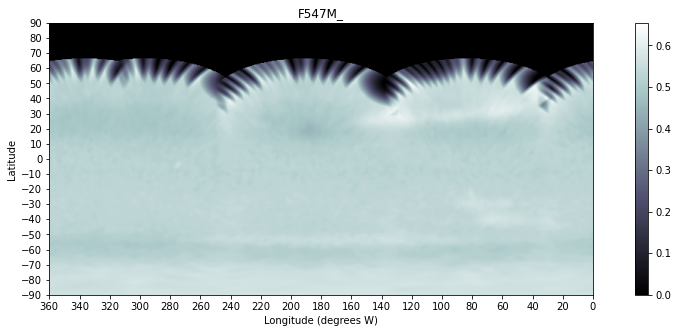

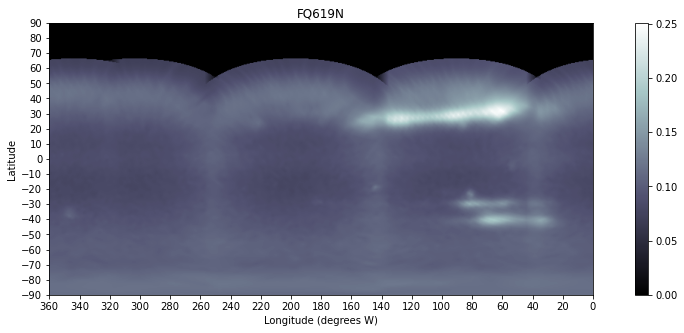

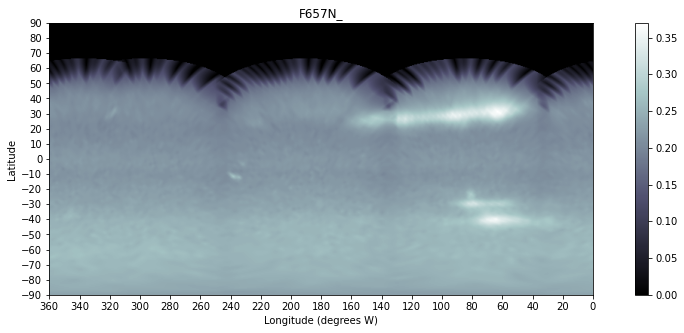

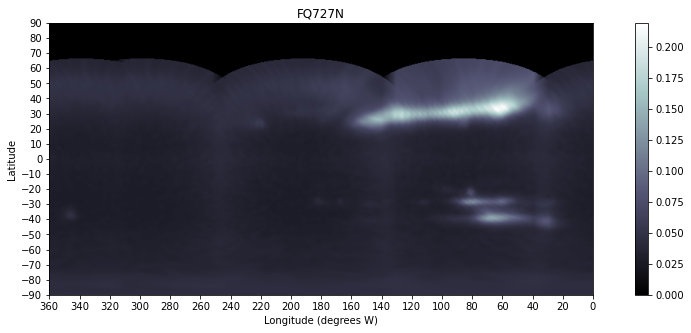

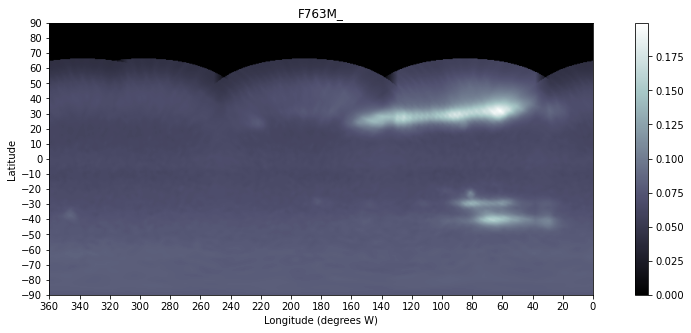

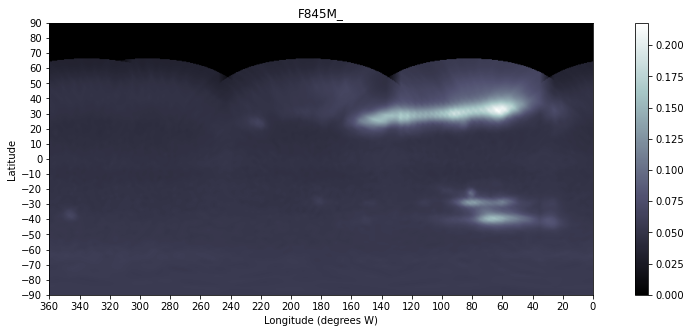

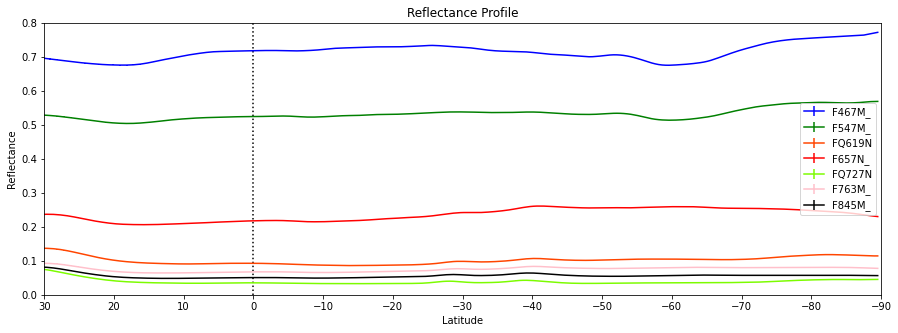

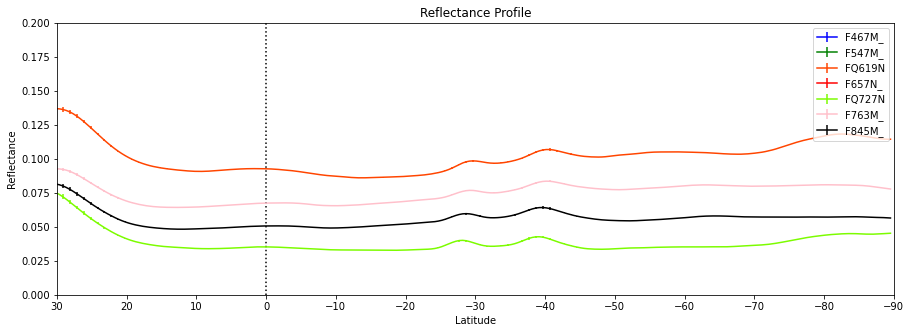

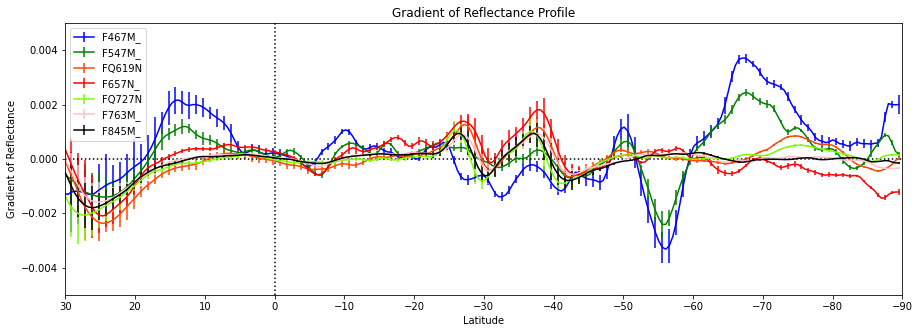

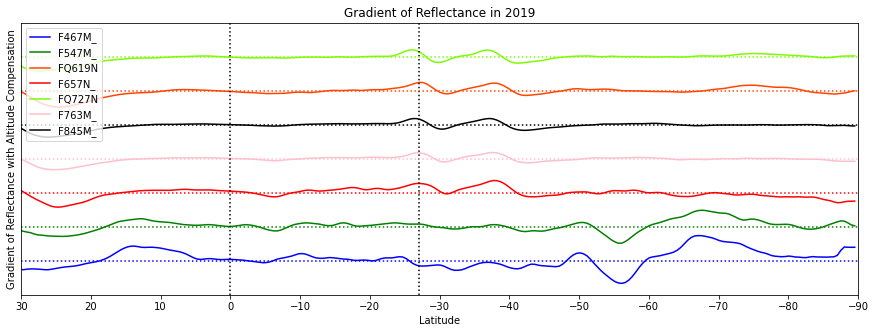

In [8]:
general_filepath = 'OPAL_Neptune/Cycle_26/'
filters = ['F467M_26_A.fits','F547M_26_A.fits','FQ619N_26_A.fits','F657N_26_A.fits','FQ727N_26_A.fits','F763M_26_A.fits','F845M_26_A.fits']
filtername = ['','','','','','','']
plotcolours = ['blue','green','orangered','red','lawngreen','pink','black'] #chosen to illustrate plots
IFScaleFactor = [0.00475,0.00249,0.00160,0.00405,0.00203,0.00145,0.00130] #taken from the OPAL ReadMe
NoOfFilters = len(filters)
colourmap = cmaps
latlimits = [30,-90] #values for latitude chosen
degpererrbar = 1    #chosen

filepaths = []
for i in range(NoOfFilters):
    filepaths.append(general_filepath + filters[i])
    filtername[i] = filters[i][0:6]
    
#initialise the data store variable
plotRData = [0,0,0,0,0,0,0]
plotGradRData = [0,0,0,0,0,0,0]
plotRstd = [0,0,0,0,0,0,0]
plotGradRErr = [0,0,0,0,0,0,0]

file = get_pkg_data_filename(filepaths[0])
data = ast.getdata(file) * IFScaleFactor[0]
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

#plt.figure(figsize=(15,15))
for i in range(NoOfFilters):
    file = get_pkg_data_filename(filepaths[i])
    #ast.info(file)
    
    data = ast.getdata(file) * IFScaleFactor[i]
    resolution = data.shape
    
    R = np.zeros(resolution[0])
    Rstd = np.zeros(resolution[0])
    for j in range(resolution[0]): 
        R[j] = np.mean(data[j])
        Rstd[j] = sem(data[j])
    plotRData[i] = R
    plotGradRData[i] = np.gradient(R)
    plotRstd[i] = Rstd
    plotGradRErr[i] = graderr(R,Rstd,10)
    
    #PLOTS IMAGES
    plt.figure(figsize=(15,5))
    plt.imshow(data, cmap=colourmap[i], extent=[360,0,-90,90])
    plt.title(str(filtername[i]))
    plt.xlabel("Longitude (degrees W)")
    plt.ylabel("Latitude")
    plt.xticks(longticks)
    plt.yticks(latticks)
    plt.colorbar()

#PLOTTING THE REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,0.8]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

#PLOTTING THE REFLECTANCE DATA (ZOOMED PLOT)
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,0.2]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper right')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotGradRData[i], yerr=plotGradRErr[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA WITH ALTITUDE FUDGE FACTOR
altfudges = [-0.015,-0.010,0.010,-0.005,0.015,0,0.005] #fudge factors to bring lines to altitude
plotGradRAlt = plotGradRData #initialise new grad r values
for i in range(len(plotGradRAlt)):
    plotGradRAlt[i] = plotGradRData[i]+altfudges[i]  #include fudges

plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.plot(lat, plotGradRAlt[i], color = plotcolours[i], label = filtername[i])
plt.title('Gradient of Reflectance in 2019')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.yticks([1,-1])
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance with Altitude Compensation')
plt.ylim([-0.02,0.02]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':')
plt.axvline(x=-27, color='black', ls=':')
for i in range(len(plotGradRAlt)):
    plt.axhline(y=altfudges[i], color=plotcolours[i], ls=':') #plots line at 0 with fudges included
plt.legend(loc='upper left')
plt.savefig("26GradDepth.png", bbox_inches = 'tight',facecolor='white')

# Cycle 27 Neptune (2020)

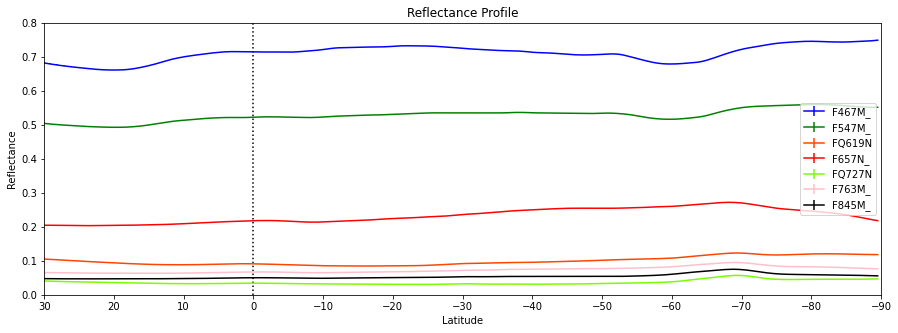

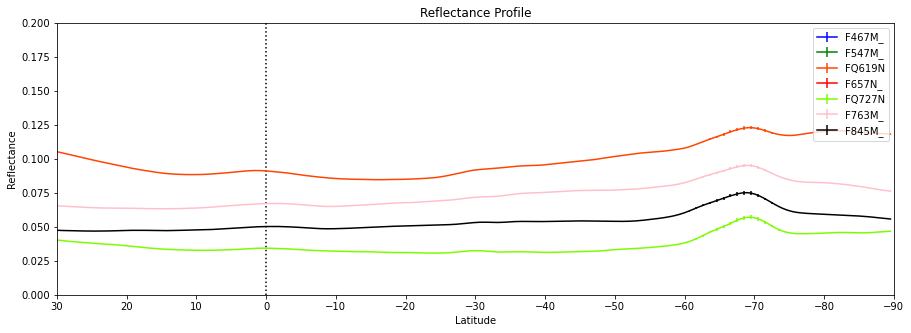

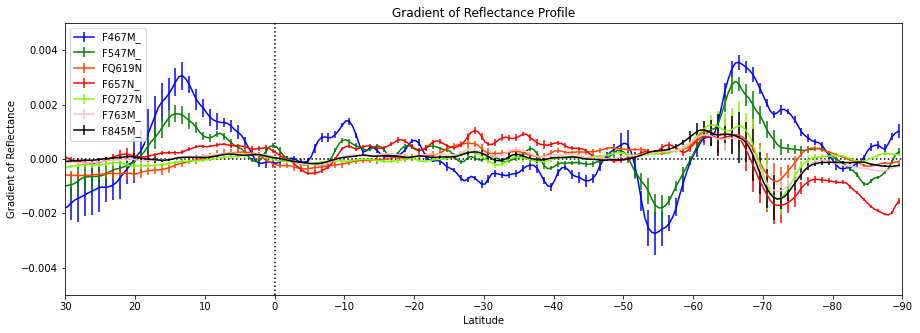

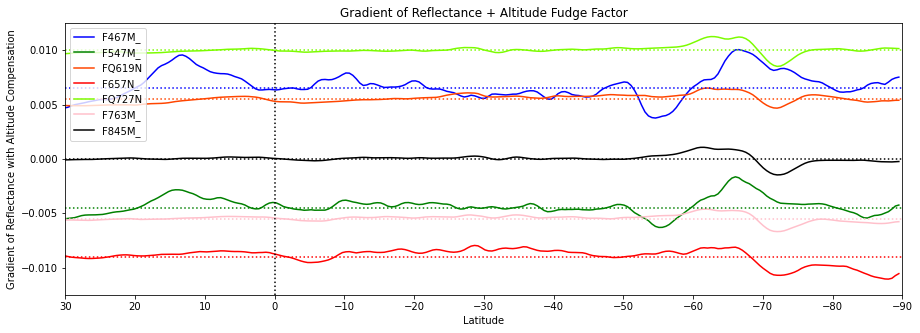

In [7]:
general_filepath = 'OPAL_Neptune/Cycle_27/'
filters = ['F467M_27_A.fits','F547M_27_A.fits','FQ619N_27_A.fits','F657N_27_A.fits','FQ727N_27_A.fits','F763M_27_A.fits','F845M_27_A.fits']
filtername = ['','','','','','','']
plotcolours = ['blue','green','orangered','red','lawngreen','pink','black'] #chosen to illustrate plots
IFScaleFactor = [0.00475,0.00249,0.00160,0.00405,0.00203,0.00145,0.00130] #taken from the OPAL ReadMe
NoOfFilters = len(filters)
colourmap = cmaps
latlimits = [30,-90] #values for latitude chosen
degpererrbar = 1    #chosen

filepaths = []
for i in range(NoOfFilters):
    filepaths.append(general_filepath + filters[i])
    filtername[i] = filters[i][0:6]
    
#initialise the data store variable
plotRData = [0,0,0,0,0,0,0]
plotGradRData = [0,0,0,0,0,0,0]
plotRstd = [0,0,0,0,0,0,0]
plotGradRErr = [0,0,0,0,0,0,0]

file = get_pkg_data_filename(filepaths[0])
data = ast.getdata(file) * IFScaleFactor[0]
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

#plt.figure(figsize=(15,15))
for i in range(NoOfFilters):
    file = get_pkg_data_filename(filepaths[i])
    #ast.info(file)
    
    data = ast.getdata(file) * IFScaleFactor[i]
    resolution = data.shape
    
    R = np.zeros(resolution[0])
    Rstd = np.zeros(resolution[0])
    for j in range(resolution[0]): 
        R[j] = np.mean(data[j])
        Rstd[j] = sem(data[j])
    plotRData[i] = R
    plotGradRData[i] = np.gradient(R)
    plotRstd[i] = Rstd
    plotGradRErr[i] = graderr(R,Rstd,10)
    
    #PLOTS IMAGES
    #plt.figure(figsize=(15,5))
    #plt.imshow(data, cmap=colourmap[i], extent=[360,0,-90,90])
    #plt.title(str(filtername[i]))
    #plt.xlabel("Longitude (degrees W)")
    #plt.ylabel("Latitude")
    #plt.xticks(longticks)
    #plt.yticks(latticks)
    #plt.colorbar()

#PLOTTING THE REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,0.8]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

#PLOTTING THE REFLECTANCE DATA (ZOOMED PLOT)
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,0.2]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper right')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotGradRData[i], yerr=plotGradRErr[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA WITH ALTITUDE FUDGE FACTOR
altfudges = [0.0065,-0.0045,0.0055,-0.009,0.01,-0.0055,0] #fudge factors to bring lines to altitude
plotGradRAlt = plotGradRData #initialise new grad r values
for i in range(len(plotGradRAlt)):
    plotGradRAlt[i] = plotGradRData[i]+altfudges[i]  #include fudges

plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.plot(lat, plotGradRAlt[i], color = plotcolours[i], label = filtername[i])
plt.title('Gradient of Reflectance + Altitude Fudge Factor')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance with Altitude Compensation')
plt.ylim([-0.0125,0.0125]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':')
for i in range(len(plotGradRAlt)):
    plt.axhline(y=altfudges[i], color=plotcolours[i], ls=':') #plots line at 0 with fudges included
plt.legend(loc='upper left')
plt.savefig("27GradDepth.png", bbox_inches = 'tight')

# Cycle 25 Neptune (2018)

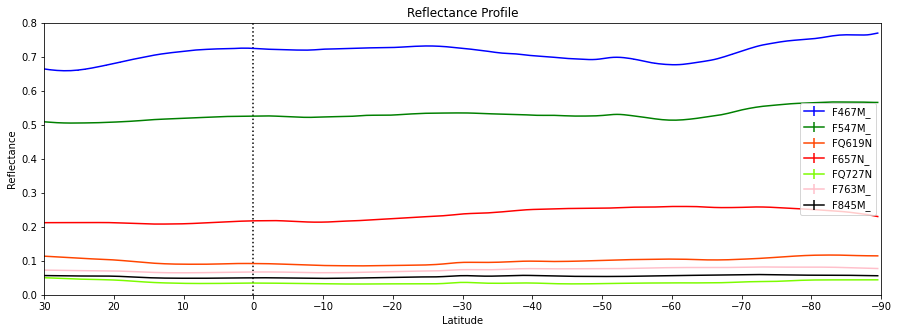

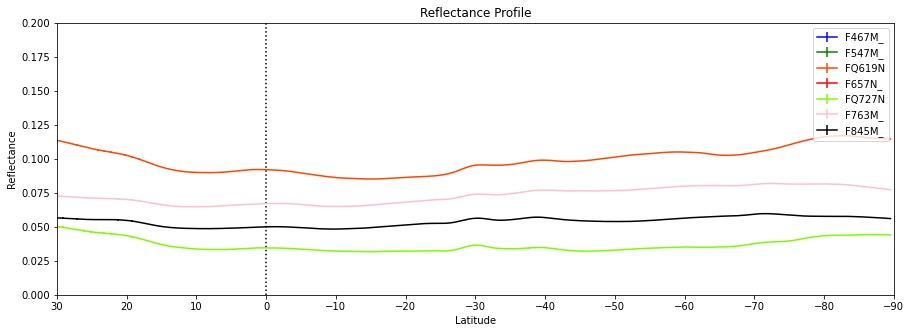

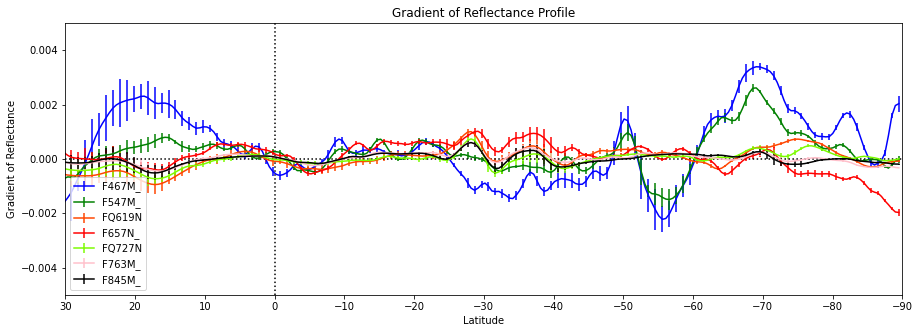

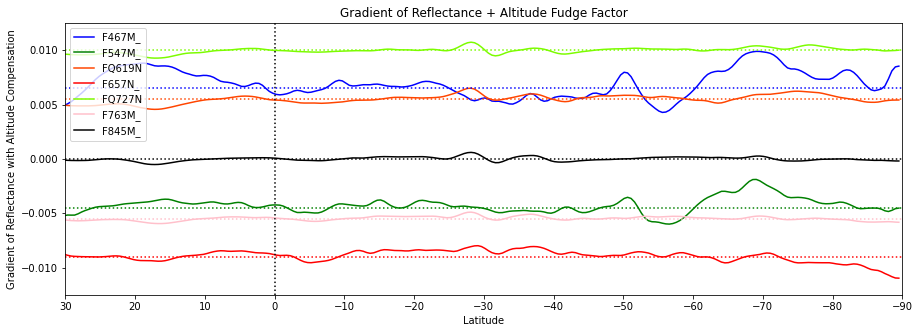

In [17]:
general_filepath = 'OPAL_Neptune/Cycle_25/'
filters = ['F467M_25_C.fits','F547M_25_C.fits','FQ619N_25_C.fits','F657N_25_C.fits','FQ727N_25_C.fits','F763M_25_C.fits','F845M_25_C.fits']
filtername = ['','','','','','','']
plotcolours = ['blue','green','orangered','red','lawngreen','pink','black'] #chosen to illustrate plots
IFScaleFactor = [0.00475,0.00249,0.00160,0.00405,0.00203,0.00145,0.00130] #taken from the OPAL ReadMe
NoOfFilters = len(filters)
colourmap = cmaps
latlimits = [30,-90] #values for latitude chosen
degpererrbar = 1    #chosen

filepaths = []
for i in range(NoOfFilters):
    filepaths.append(general_filepath + filters[i])
    filtername[i] = filters[i][0:6]
    
#initialise the data store variable
plotRData = [0,0,0,0,0,0,0]
plotGradRData = [0,0,0,0,0,0,0]
plotRstd = [0,0,0,0,0,0,0]
plotGradRErr = [0,0,0,0,0,0,0]

file = get_pkg_data_filename(filepaths[0])
data = ast.getdata(file) * IFScaleFactor[0]
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

#plt.figure(figsize=(15,15))
for i in range(NoOfFilters):
    file = get_pkg_data_filename(filepaths[i])
    #ast.info(file)
    
    data = ast.getdata(file) * IFScaleFactor[i]
    resolution = data.shape
    
    R = np.zeros(resolution[0])
    Rstd = np.zeros(resolution[0])
    for j in range(resolution[0]): 
        R[j] = np.mean(data[j])
        Rstd[j] = sem(data[j])
    plotRData[i] = R
    plotGradRData[i] = np.gradient(R)
    plotRstd[i] = Rstd
    plotGradRErr[i] = graderr(R,Rstd,10)
    
    #PLOTS IMAGES
    #plt.figure(figsize=(15,5))
    #plt.imshow(data, cmap=colourmap[i], extent=[360,0,-90,90])
    #plt.title(str(filtername[i]))
    #plt.xlabel("Longitude (degrees W)")
    #plt.ylabel("Latitude")
    #plt.xticks(longticks)
    #plt.yticks(latticks)
    #plt.colorbar()

#PLOTTING THE REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,0.8]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

#PLOTTING THE REFLECTANCE DATA (ZOOMED PLOT)
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,0.2]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper right')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotGradRData[i], yerr=plotGradRErr[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='lower left')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA WITH ALTITUDE FUDGE FACTOR
altfudges = [0.0065,-0.0045,0.0055,-0.009,0.01,-0.0055,0] #fudge factors to bring lines to altitude
plotGradRAlt = plotGradRData #initialise new grad r values
for i in range(len(plotGradRAlt)):
    plotGradRAlt[i] = plotGradRData[i]+altfudges[i]  #include fudges

plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.plot(lat, plotGradRAlt[i], color = plotcolours[i], label = filtername[i])
plt.title('Gradient of Reflectance + Altitude Fudge Factor')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance with Altitude Compensation')
plt.ylim([-0.0125,0.0125]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':')
for i in range(len(plotGradRAlt)):
    plt.axhline(y=altfudges[i], color=plotcolours[i], ls=':') #plots line at 0 with fudges included
plt.legend(loc='upper left')
plt.savefig("25GradDepth.png", bbox_inches = 'tight')

# Cycle 24 Neptune (2017)

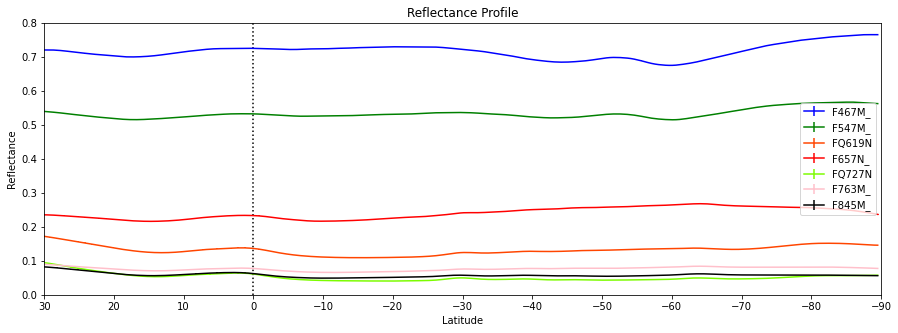

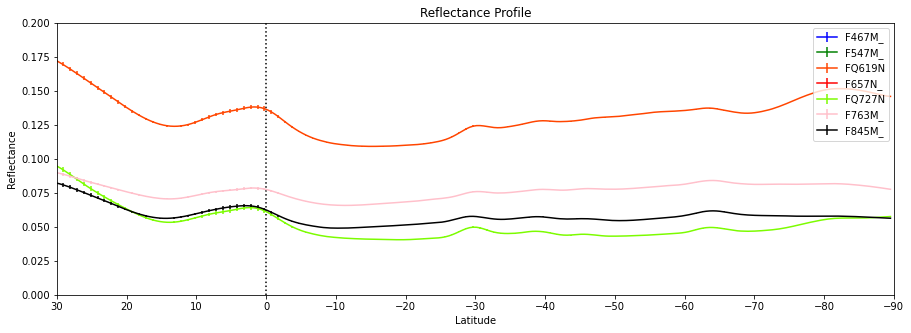

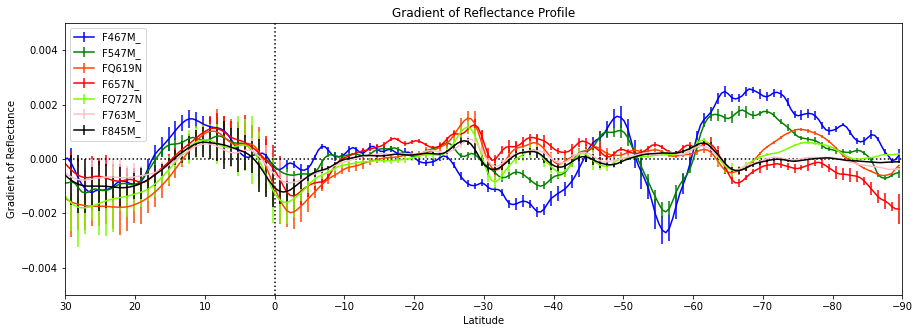

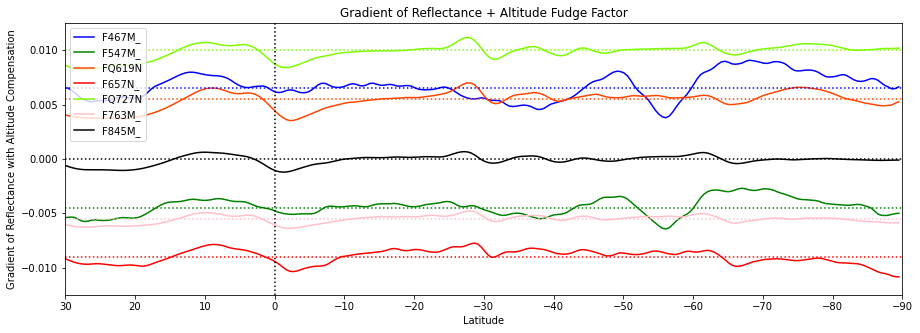

In [12]:
general_filepath = 'OPAL_Neptune/Cycle_24/'
filters = ['F467M_24_A.fits','F547M_24_A.fits','FQ619N_24_A.fits','F657N_24_A.fits','FQ727N_24_A.fits','F763M_24_A.fits','F845M_24_A.fits']
filtername = ['','','','','','','']
plotcolours = ['blue','green','orangered','red','lawngreen','pink','black'] #chosen to illustrate plots
IFScaleFactor = [0.00475,0.00249,0.00205,0.00405,0.00260,0.00145,0.00130] #taken from the OPAL ReadMe
NoOfFilters = len(filters)
colourmap = cmaps
latlimits = [30,-90] #values for latitude chosen
degpererrbar = 1    #chosen

filepaths = []
for i in range(NoOfFilters):
    filepaths.append(general_filepath + filters[i])
    filtername[i] = filters[i][0:6]
    
#initialise the data store variable
plotRData = [0,0,0,0,0,0,0]
plotGradRData = [0,0,0,0,0,0,0]
plotRstd = [0,0,0,0,0,0,0]
plotGradRErr = [0,0,0,0,0,0,0]

file = get_pkg_data_filename(filepaths[0])
data = ast.getdata(file) * IFScaleFactor[0]
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

#plt.figure(figsize=(15,15))
for i in range(NoOfFilters):
    file = get_pkg_data_filename(filepaths[i])
    #ast.info(file)
    
    data = ast.getdata(file) * IFScaleFactor[i]
    resolution = data.shape
    
    R = np.zeros(resolution[0])
    Rstd = np.zeros(resolution[0])
    for j in range(resolution[0]): 
        R[j] = np.mean(data[j])
        Rstd[j] = sem(data[j])
    plotRData[i] = R
    plotGradRData[i] = np.gradient(R)
    plotRstd[i] = Rstd
    plotGradRErr[i] = graderr(R,Rstd,10)
    
    #PLOTS IMAGES
    #plt.figure(figsize=(15,5))
    #plt.imshow(data, cmap=colourmap[i], extent=[360,0,-90,90])
    #plt.title(str(filtername[i]))
    #plt.xlabel("Longitude (degrees W)")
    #plt.ylabel("Latitude")
    #plt.xticks(longticks)
    #plt.yticks(latticks)
    #plt.colorbar()

#PLOTTING THE REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,0.8]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

#PLOTTING THE REFLECTANCE DATA (ZOOMED PLOT)
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,0.2]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper right')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotGradRData[i], yerr=plotGradRErr[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA WITH ALTITUDE FUDGE FACTOR
altfudges = [0.0065,-0.0045,0.0055,-0.009,0.01,-0.0055,0] #fudge factors to bring lines to altitude
plotGradRAlt = plotGradRData #initialise new grad r values
for i in range(len(plotGradRAlt)):
    plotGradRAlt[i] = plotGradRData[i]+altfudges[i]  #include fudges

plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.plot(lat, plotGradRAlt[i], color = plotcolours[i], label = filtername[i])
plt.title('Gradient of Reflectance + Altitude Fudge Factor')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance with Altitude Compensation')
plt.ylim([-0.0125,0.0125]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':')
for i in range(len(plotGradRAlt)):
    plt.axhline(y=altfudges[i], color=plotcolours[i], ls=':') #plots line at 0 with fudges included
plt.legend(loc='upper left')
plt.savefig("24GradDepth.png", bbox_inches = 'tight')

# Cycle 23 Neptune (2016)

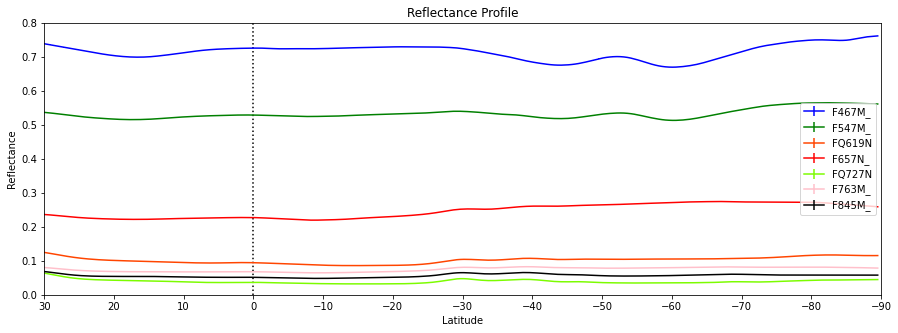

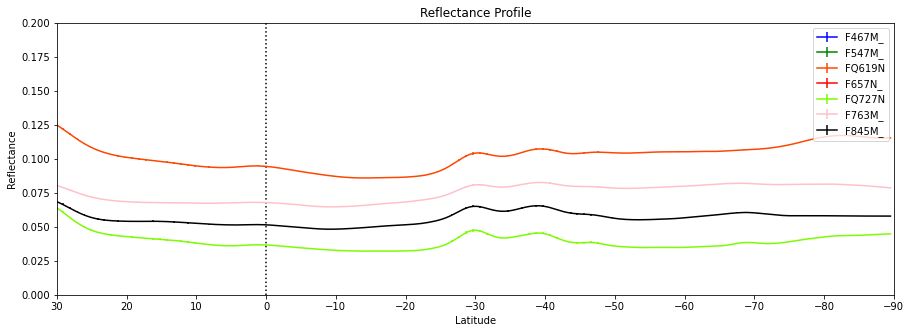

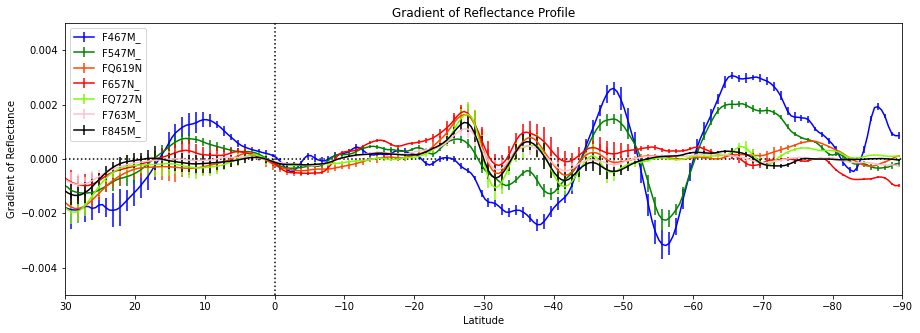

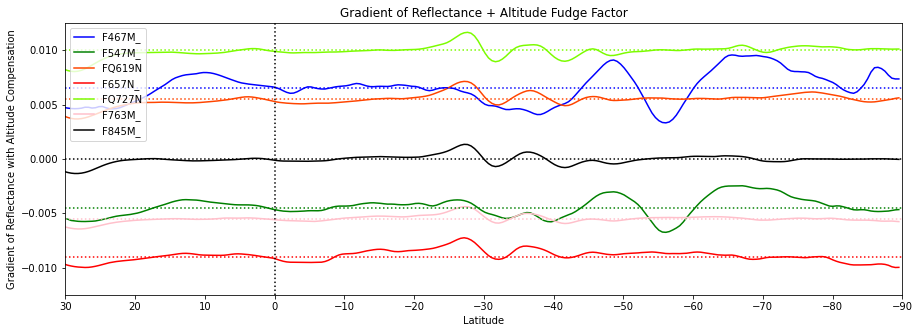

In [13]:
general_filepath = 'OPAL_Neptune/Cycle_23/'
filters = ['F467M_23_A.fits','F547M_23_A.fits','FQ619N_23_A.fits','F657N_23_A.fits','FQ727N_23_A.fits','F763M_23_A.fits','F845M_23_A.fits']
filtername = ['','','','','','','']
plotcolours = ['blue','green','orangered','red','lawngreen','pink','black'] #chosen to illustrate plots
IFScaleFactor = [0.00475,0.00249,0.00160,0.00406,0.00203,0.00145,0.00130] #taken from the OPAL ReadMe
NoOfFilters = len(filters)
colourmap = cmaps
latlimits = [30,-90] #values for latitude chosen
degpererrbar = 1    #chosen

filepaths = []
for i in range(NoOfFilters):
    filepaths.append(general_filepath + filters[i])
    filtername[i] = filters[i][0:6]
    
#initialise the data store variable
plotRData = [0,0,0,0,0,0,0]
plotGradRData = [0,0,0,0,0,0,0]
plotRstd = [0,0,0,0,0,0,0]
plotGradRErr = [0,0,0,0,0,0,0]

file = get_pkg_data_filename(filepaths[0])
data = ast.getdata(file) * IFScaleFactor[0]
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

#plt.figure(figsize=(15,15))
for i in range(NoOfFilters):
    file = get_pkg_data_filename(filepaths[i])
    #ast.info(file)
    
    data = ast.getdata(file) * IFScaleFactor[i]
    resolution = data.shape
    
    R = np.zeros(resolution[0])
    Rstd = np.zeros(resolution[0])
    for j in range(resolution[0]): 
        R[j] = np.mean(data[j])
        Rstd[j] = sem(data[j])
    plotRData[i] = R
    plotGradRData[i] = np.gradient(R)
    plotRstd[i] = Rstd
    plotGradRErr[i] = graderr(R,Rstd,10)
    
    #PLOTS IMAGES
    #plt.figure(figsize=(15,5))
    #plt.imshow(data, cmap=colourmap[i], extent=[360,0,-90,90])
    #plt.title(str(filtername[i]))
    #plt.xlabel("Longitude (degrees W)")
    #plt.ylabel("Latitude")
    #plt.xticks(longticks)
    #plt.yticks(latticks)
    #plt.colorbar()

#PLOTTING THE REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,0.8]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

#PLOTTING THE REFLECTANCE DATA (ZOOMED PLOT)
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,0.2]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper right')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotGradRData[i], yerr=plotGradRErr[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA WITH ALTITUDE FUDGE FACTOR
altfudges = [0.0065,-0.0045,0.0055,-0.009,0.01,-0.0055,0] #fudge factors to bring lines to altitude
plotGradRAlt = plotGradRData #initialise new grad r values
for i in range(len(plotGradRAlt)):
    plotGradRAlt[i] = plotGradRData[i]+altfudges[i]  #include fudges

plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.plot(lat, plotGradRAlt[i], color = plotcolours[i], label = filtername[i])
plt.title('Gradient of Reflectance + Altitude Fudge Factor')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance with Altitude Compensation')
plt.ylim([-0.0125,0.0125]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':')
for i in range(len(plotGradRAlt)):
    plt.axhline(y=altfudges[i], color=plotcolours[i], ls=':') #plots line at 0 with fudges included
plt.legend(loc='upper left')
plt.savefig("23GradDepth.png", bbox_inches = 'tight')

# Cycle 22 Neptune (2015)

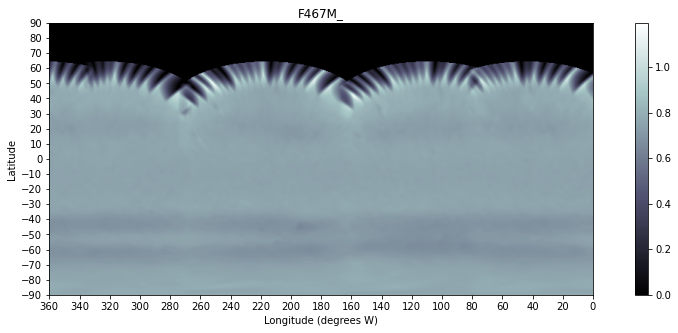

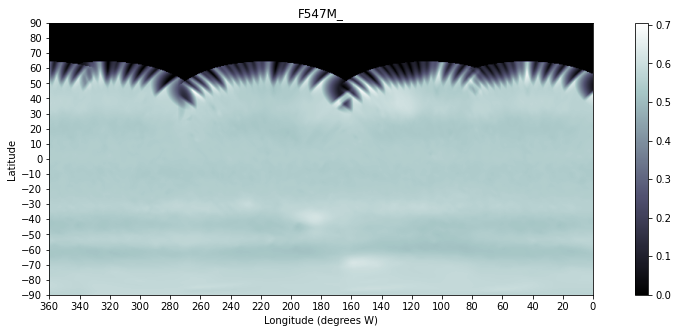

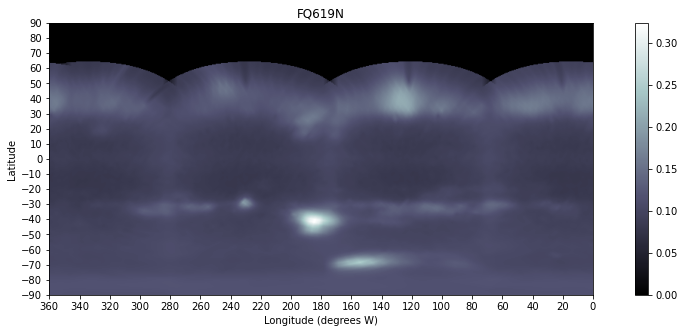

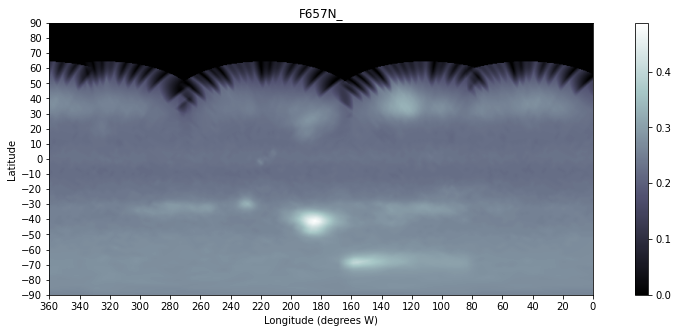

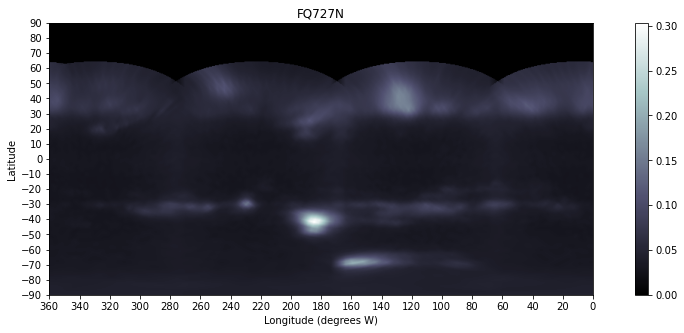

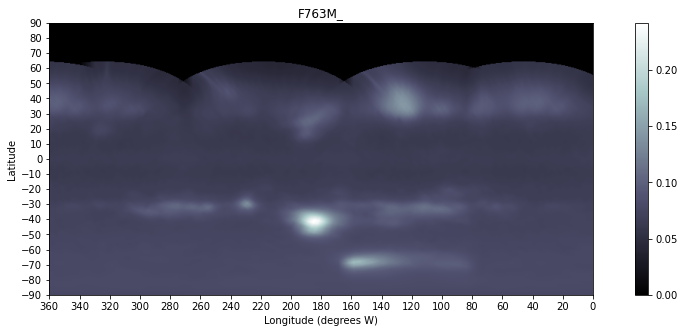

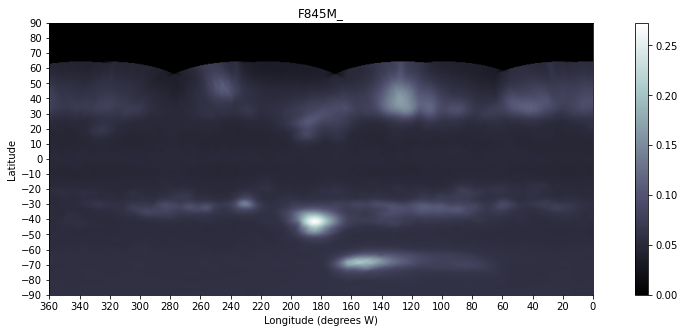

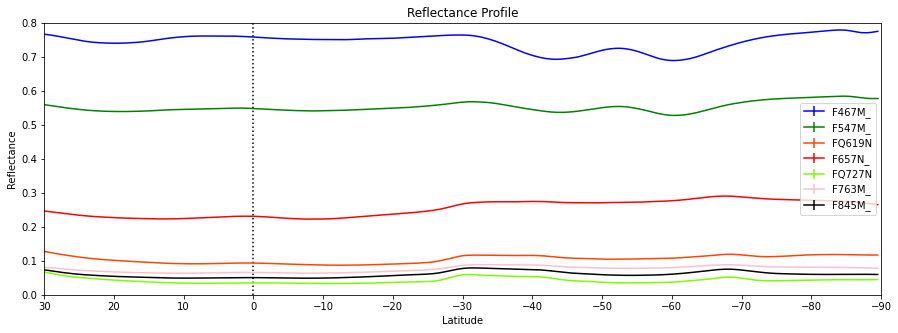

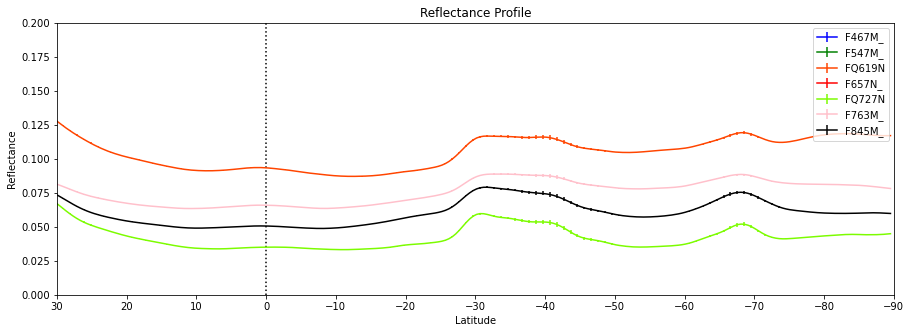

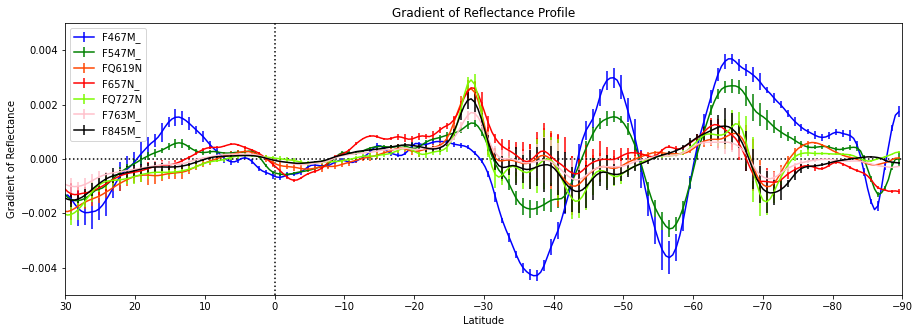

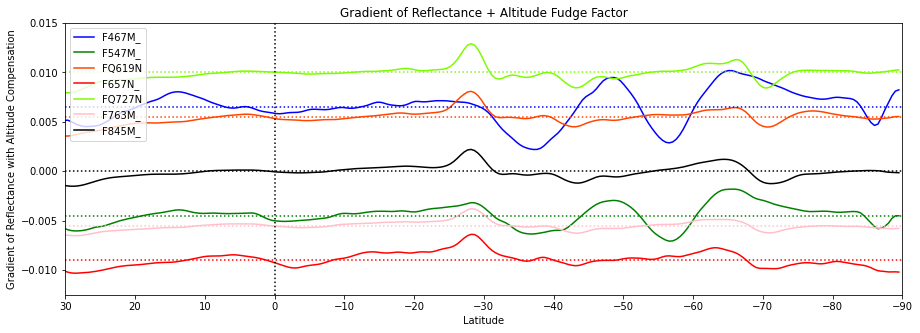

In [4]:
general_filepath = 'OPAL_Neptune/Cycle_22/'
filters = ['F467M_22_A.fits','F547M_22_A.fits','FQ619N_22_A.fits','F657N_22_A.fits','FQ727N_22_A.fits','F763M_22_A.fits','F845M_22_A.fits']
filtername = ['','','','','','','']
plotcolours = ['blue','green','orangered','red','lawngreen','pink','black'] #chosen to illustrate plots
IFScaleFactor = [0.00741,0.00295,0.00160,0.00529,0.00203,0.00146,0.00135] #taken from the OPAL ReadMe
NoOfFilters = len(filters)
colourmap = cmaps
latlimits = [30,-90] #values for latitude chosen
degpererrbar = 1    #chosen

filepaths = []
for i in range(NoOfFilters):
    filepaths.append(general_filepath + filters[i])
    filtername[i] = filters[i][0:6]
    
#initialise the data store variable
plotRData = [0,0,0,0,0,0,0]
plotGradRData = [0,0,0,0,0,0,0]
plotRstd = [0,0,0,0,0,0,0]
plotGradRErr = [0,0,0,0,0,0,0]

file = get_pkg_data_filename(filepaths[0])
data = ast.getdata(file) * IFScaleFactor[0]
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

#plt.figure(figsize=(15,15))
for i in range(NoOfFilters):
    file = get_pkg_data_filename(filepaths[i])
    #ast.info(file)
    
    data = ast.getdata(file) * IFScaleFactor[i]
    resolution = data.shape
    
    R = np.zeros(resolution[0])
    Rstd = np.zeros(resolution[0])
    for j in range(resolution[0]): 
        R[j] = np.mean(data[j])
        Rstd[j] = sem(data[j])
    plotRData[i] = R
    plotGradRData[i] = np.gradient(R)
    plotRstd[i] = Rstd
    plotGradRErr[i] = graderr(R,Rstd,10)
    
    #PLOTS IMAGES
    plt.figure(figsize=(15,5))
    plt.imshow(data, cmap=colourmap[i], extent=[360,0,-90,90])
    plt.title(str(filtername[i]))
    plt.xlabel("Longitude (degrees W)")
    plt.ylabel("Latitude")
    plt.xticks(longticks)
    plt.yticks(latticks)
    plt.colorbar()

#PLOTTING THE REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,0.8]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

#PLOTTING THE REFLECTANCE DATA (ZOOMED PLOT)
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotRData[i], yerr = plotRstd[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,0.2]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper right')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.errorbar(lat, plotGradRData[i], yerr=plotGradRErr[i], color = plotcolours[i], label = filtername[i], errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

#PLOTTING THE GRADIENT OF REFLECTANCE DATA WITH ALTITUDE FUDGE FACTOR
altfudges = [0.0065,-0.0045,0.0055,-0.009,0.01,-0.0055,0] #fudge factors to bring lines to altitude
plotGradRAlt = plotGradRData #initialise new grad r values
for i in range(len(plotGradRAlt)):
    plotGradRAlt[i] = plotGradRData[i]+altfudges[i]  #include fudges

plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
for i in range(len(plotRData)):
    axR.plot(lat, plotGradRAlt[i], color = plotcolours[i], label = filtername[i])
plt.title('Gradient of Reflectance + Altitude Fudge Factor')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance with Altitude Compensation')
plt.ylim([-0.0125,0.015]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':')
for i in range(len(plotGradRAlt)):
    plt.axhline(y=altfudges[i], color=plotcolours[i], ls=':') #plots line at 0 with fudges included
plt.legend(loc='upper left')
plt.savefig("22GradDepth.png", bbox_inches = 'tight')